In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import colorsys
import graphviz


In [ ]:
data = pd.read_csv(r"/content/data.csv")
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

**COMENZAMOS CON EL EDA** 

In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
#Empezamos agrupando los precios por la ciudad en la que se encuentra la casas
df_agg = data.groupby(['city']).agg({'price':sum})
df_agg
df_agg.sort_values(by=['price'], ascending=False)

,price
city,
Seattle,9.120843e+08
Bellevue,2.422937e+08
Redmond,1.568976e+08
Kirkland,1.218461e+08
Sammamish,1.202106e+08
Issaquah,1.114826e+08
Renton,1.104730e+08
Mercer Island,9.664832e+07
Kent,8.130610e+07


In [ ]:
#El número de pisos que predominan en las casas
data['floors'].value_counts().to_frame

<bound method Series.to_frame of 1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: floors, dtype: int64>

In [ ]:
#El número de baños que predominan en las casas
data['bathrooms'].value_counts().to_frame

<bound method Series.to_frame of 2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: bathrooms, dtype: int64>

In [ ]:
#El número de habitaciones que predominan en las casas
data['bedrooms'].value_counts().to_frame

<bound method Series.to_frame of 3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64>

In [ ]:
#De pies cuadrados a metros cuadrados
data['m2_casa'] = data['sqft_living'] * 0.092903
data['m2_lote'] = data['sqft_lot'] * 0.092903
data['m2_above'] = data['sqft_above'] * 0.092903
data['m2_basement'] = data['sqft_basement'] * 0.092903
data


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,m2_casa,m2_lote,m2_above,m2_basement
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,124.49002,735.048536,124.49002,0.00000
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,...,1921,0,709 W Blaine St,Seattle,WA 98119,USA,339.09595,840.772150,313.08311,26.01284
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,...,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,179.30279,1109.912141,179.30279,0.00000
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,...,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,185.80600,746.011090,92.90300,92.90300
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,...,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,180.23182,975.481500,105.90942,74.32240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,...,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,140.28353,590.863080,140.28353,0.00000
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,...,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,135.63838,703.554419,135.63838,0.00000
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,...,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,279.63803,651.621642,279.63803,0.00000
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,...,1974,0,5148 S Creston St,Seattle,WA 98178,USA,194.16727,615.946890,99.40621,94.76106


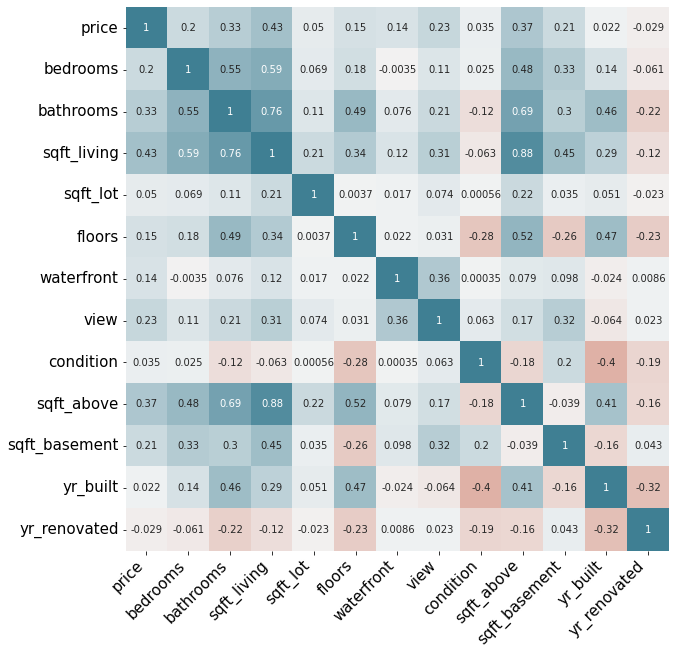

In [ ]:
#Correlación de las variables
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 15)

(0.0, 27919500.0)

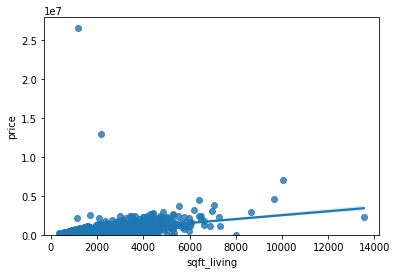

In [ ]:
#Correlación entre los metros cuadrados habitables y el precio
sns.regplot(x="sqft_living", y="price", data=data)
plt.ylim(0,)

In [ ]:
#Separar la fecha en año mes y dia de venta
df_date= data["date"].str.split('[--]', expand=True)
df_date.columns = ['año', 'mes', 'dia_mal']
df_date

,año,mes,dia_mal
0,2014,05,02 00:00:00
1,2014,05,02 00:00:00
2,2014,05,02 00:00:00
3,2014,05,02 00:00:00
4,2014,05,02 00:00:00
...,...,...,...
4595,2014,07,09 00:00:00
4596,2014,07,09 00:00:00
4597,2014,07,09 00:00:00
4598,2014,07,10 00:00:00


In [ ]:

df_date2= df_date["dia_mal"].str.split('[ ]', expand=True)
df_date2.columns = ['dia', 'hora',]
df_date2

,dia,hora
0,02,00:00:00
1,02,00:00:00
2,02,00:00:00
3,02,00:00:00
4,02,00:00:00
...,...,...
4595,09,00:00:00
4596,09,00:00:00
4597,09,00:00:00
4598,10,00:00:00


In [ ]:
#La fecha
df_fecha = pd.concat([df_date, df_date2], axis=1)
df_fecha

,año,mes,dia_mal,dia,hora
0,2014,05,02 00:00:00,02,00:00:00
1,2014,05,02 00:00:00,02,00:00:00
2,2014,05,02 00:00:00,02,00:00:00
3,2014,05,02 00:00:00,02,00:00:00
4,2014,05,02 00:00:00,02,00:00:00
...,...,...,...,...,...
4595,2014,07,09 00:00:00,09,00:00:00
4596,2014,07,09 00:00:00,09,00:00:00
4597,2014,07,09 00:00:00,09,00:00:00
4598,2014,07,10 00:00:00,10,00:00:00


In [ ]:
df_fecha_bueno = df_fecha.drop(['dia_mal'], axis=1)
df_fecha_bueno

,año,mes,dia,hora
0,2014,05,02,00:00:00
1,2014,05,02,00:00:00
2,2014,05,02,00:00:00
3,2014,05,02,00:00:00
4,2014,05,02,00:00:00
...,...,...,...,...
4595,2014,07,09,00:00:00
4596,2014,07,09,00:00:00
4597,2014,07,09,00:00:00
4598,2014,07,10,00:00:00


In [ ]:
dataframe = pd.concat([data, df_fecha_bueno], axis=1)
dataframe

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,statezip,country,m2_casa,m2_lote,m2_above,m2_basement,año,mes,dia,hora
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,...,WA 98133,USA,124.49002,735.048536,124.49002,0.00000,2014,05,02,00:00:00
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,...,WA 98119,USA,339.09595,840.772150,313.08311,26.01284,2014,05,02,00:00:00
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,...,WA 98042,USA,179.30279,1109.912141,179.30279,0.00000,2014,05,02,00:00:00
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,...,WA 98008,USA,185.80600,746.011090,92.90300,92.90300,2014,05,02,00:00:00
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,...,WA 98052,USA,180.23182,975.481500,105.90942,74.32240,2014,05,02,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,...,WA 98133,USA,140.28353,590.863080,140.28353,0.00000,2014,07,09,00:00:00
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,...,WA 98007,USA,135.63838,703.554419,135.63838,0.00000,2014,07,09,00:00:00
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,...,WA 98059,USA,279.63803,651.621642,279.63803,0.00000,2014,07,09,00:00:00
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,...,WA 98178,USA,194.16727,615.946890,99.40621,94.76106,2014,07,10,00:00:00


In [ ]:
#Vemos que casas tienen sotano,0 NO,1 SI.
dataframe['sotano'] = np.where(dataframe['m2_basement'] != 0, 1, 0)

In [ ]:
#Las casas sin sotanos son más caras
casas_sotano=dataframe.groupby(['sotano']).agg({'price':sum})
casas_sotano

,price
sotano,
0,1.374300e+09
1,1.164730e+09


In [ ]:
#Las casas con  menos vistas son más caras
visitadas=dataframe.groupby(['view']).agg({'price':sum})
visitadas

,price
view,
0,2.114236e+09
1,5.982376e+07
2,1.658317e+08
3,1.157921e+08
4,8.334667e+07


In [ ]:
#Las casas sin sotanos son más caras
visitadas=dataframe.groupby(['waterfront']).agg({'view':sum})
visitadas

,view
waterfront,
0,990
1,117


In [ ]:
#Las casas frente al mar son menos caras
visitadas=dataframe.groupby(['waterfront']).agg({'price':sum})
visitadas

,price
waterfront,
0,2.491126e+09
1,4.790350e+07


In [ ]:
#Debido a que también son mas pequeñas
visitadas=dataframe.groupby(['waterfront']).agg({'m2_lote':sum})
visitadas

,m2_lote
waterfront,
0,6.279433e+06
1,6.784613e+04


In [ ]:
#Las que estan en frente de la costa no tienen sotan9os
visitadas=dataframe.groupby(['waterfront']).agg({'sotano':sum})
visitadas

,sotano
waterfront,
0,1836
1,19


In [ ]:
#Agrupacion del precio de las casas según el número de pisos
visitadas=dataframe.groupby(['floors']).agg({'price':sum})
visitadas

,price
floors,
1.0,9.941239e+08
1.5,2.569396e+08
2.0,1.173501e+09
2.5,4.033840e+07
3.0,7.246817e+07
3.5,1.658500e+06


In [ ]:
#Agrupacion del precio de las casas según el número de habitaciones
visitadas=dataframe.groupby(['bedrooms']).agg({'price':sum})
visitadas

,price
bedrooms,
0.0,2.390648e+06
1.0,1.041490e+07
2.0,2.216580e+08
3.0,9.928617e+08
4.0,9.723677e+08
5.0,2.718757e+08
6.0,4.985913e+07
7.0,1.469200e+07
8.0,2.310000e+06


In [ ]:
#Las casas que han sido renovadas son más baratas
dataframe['renovated'] = np.where(dataframe['yr_renovated'] != 0, 1, 0)

renovadas=dataframe.groupby(['renovated']).agg({'price':sum})
renovadas

,price
renovated,
0,1.546028e+09
1,9.930020e+08


In [ ]:
#Casas renovadas por año
e=dataframe['yr_renovated'].value_counts().to_frame
e
df = dataframe['yr_renovated'].value_counts().rename_axis('año_renovado').reset_index(name='counts')
print(df)


    año_renovado  counts
0              0    2735
1           2000     170
2           2003     151
3           2009     109
4           2001     109
5           2005      95
6           2004      77
7           2014      72
8           2006      68
9           2013      61
10          1923      57
11          1994      57
12          1989      55
13          2011      54
14          2012      45
15          2008      45
16          1988      43
17          1999      41
18          2002      41
19          1983      41
20          1998      40
21          1993      39
22          1912      33
23          1979      32
24          1992      32
25          2010      30
26          1985      29
27          1997      28
28          1996      22
29          1982      22
30          1972      17
31          1990      16
32          1956      15
33          1963      12
34          1969      11
35          1984      10
36          1970       9
37          1968       9
38          1954       8


In [ ]:
#Casas construidas por año
e=dataframe['yr_built'].value_counts().to_frame
e
df = dataframe['yr_built'].value_counts().rename_axis('años').reset_index(name='counts')




In [ ]:
#Casa de cada ciudad
e=dataframe['city'].value_counts().to_frame
e

<bound method Series.to_frame of Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale     

   estrellas  casas
0          3   2875
1          4   1252
2          5    435
3          2     32
4          1      6


<BarContainer object of 5 artists>

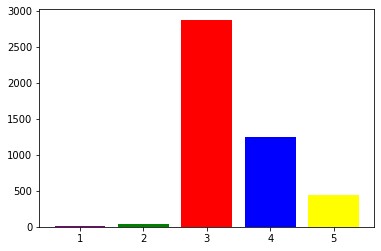

In [ ]:
#Valoración de las casas
e=dataframe['condition'].value_counts().to_frame
e
df5 = dataframe['condition'].value_counts().rename_axis('estrellas').reset_index(name='casas')
print(df5)
# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x =df5.estrellas , height = df5.casas, tick_label = df5.estrellas,color=['red','blue','yellow','green','purple'])
# plt.show()

                     condition
city                          
Seattle                   5542
Bellevue                  1027
Renton                    1006
Redmond                    761
Kirkland                   653
Kent                       651
Issaquah                   619
Auburn                     600
Sammamish                  554
Federal Way                508
Shoreline                  448
Woodinville                389
Mercer Island              326
Maple Valley               304
Burien                     263
Kenmore                    223
Snoqualmie                 215
Des Moines                 202
North Bend                 166
Covington                  157
Duvall                     129
Lake Forest Park           123
Newcastle                  122
Enumclaw                   110
Vashon                     104
Bothell                    104
SeaTac                      93
Tukwila                     88
Normandy Park               70
Carnation                   68
Clyde Hi

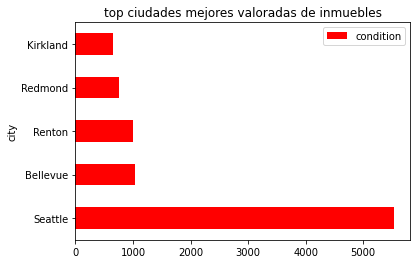

In [ ]:
#Ciudadaes con casas con mejor valoracion
df_agg = data.groupby(['city']).agg({'condition':sum})
df_agg
res = df_agg.apply(lambda x: x.sort_values(ascending=False))
print(res)
res=res.head(5)
res.plot.barh(title="top ciudades mejores valoradas de inmuebles",
             color=['red','blue','yellow','green', 'purple'])

In [ ]:
df2=df.drop(df.index[[0]])

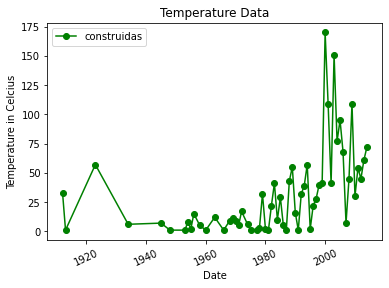

In [ ]:
#Años en las que se construyeron
res = df2.sort_values('año_renovado')

x=(res.año_renovado)
y=(res.counts)
plt.plot(x, y, color = 'g', linestyle = 'solid', marker = 'o', label = "construidas")
plt.xlabel('Date')
plt.xticks(rotation = 25)
plt.ylabel('Casas')
plt.title('Construction Data')
plt.legend()
plt.show()

**RED NEURONAL**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# Selecting columns by passing a list of desired columns
prediccion_data=dataframe[['bedrooms','bathrooms','floors','waterfront'	,'view','condition','m2_casa','m2_lote','m2_above','m2_basement','price']]
prediccion_data
conditionlist = [
    (prediccion_data['price'] <= 3.228750e+05) ,
    (prediccion_data['price'] > 3.228750e+05) & (prediccion_data['price'] <=4.609435e+05	),
    (prediccion_data['price'] > 4.609435e+05) & (prediccion_data['price'] <=6.549625e+05	),
    (prediccion_data['price'] > 6.549625e+05)]
choicelist = ['0', '1', '2','3']
prediccion_data['price_range'] = np.select(conditionlist, choicelist, default='Not Specified')
prediccion_data

<ipython-input-52-7cd081ef826f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediccion_data['price_range'] = np.select(conditionlist, choicelist, default='Not Specified')


,bedrooms,bathrooms,floors,waterfront,view,condition,m2_casa,m2_lote,m2_above,m2_basement,price,price_range
0,3.0,1.50,1.5,0,0,3,124.49002,735.048536,124.49002,0.00000,3.130000e+05,0
1,5.0,2.50,2.0,0,4,5,339.09595,840.772150,313.08311,26.01284,2.384000e+06,3
2,3.0,2.00,1.0,0,0,4,179.30279,1109.912141,179.30279,0.00000,3.420000e+05,1
3,3.0,2.25,1.0,0,0,4,185.80600,746.011090,92.90300,92.90300,4.200000e+05,1
4,4.0,2.50,1.0,0,0,4,180.23182,975.481500,105.90942,74.32240,5.500000e+05,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1.0,0,0,4,140.28353,590.863080,140.28353,0.00000,3.081667e+05,0
4596,3.0,2.50,2.0,0,0,3,135.63838,703.554419,135.63838,0.00000,5.343333e+05,2
4597,3.0,2.50,2.0,0,0,3,279.63803,651.621642,279.63803,0.00000,4.169042e+05,1
4598,4.0,2.00,1.0,0,0,3,194.16727,615.946890,99.40621,94.76106,2.034000e+05,0


In [ ]:
# Number of features
num_feats = len(prediccion_data.columns) - 1 # Extract target attribute
print('The dataset contains {} features'.format(num_feats))

# Number of labels
num_labels = len(prediccion_data['price'].unique())
print('There are {} different possible target labels.'.format(num_labels))

The dataset contains 11 features
There are 1741 different possible target labels.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
prediccion_data[prediccion_data.columns[:-1]] = scaler.fit_transform(prediccion_data[prediccion_data.columns[:-1]])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
pd.get_dummies(prediccion_data['price_range'], prefix=['price_range'])

data = pd.concat([prediccion_data, pd.get_dummies(prediccion_data['price_range'], prefix='price_range')], axis=1)
data.drop(['price_range'], axis=1, inplace=True)

display(data)

,bedrooms,bathrooms,floors,waterfront,view,condition,m2_casa,m2_lote,m2_above,m2_basement,price,price_range_0,price_range_1,price_range_2,price_range_3
0,0.333333,0.18750,0.2,0.0,0.0,0.50,0.073652,0.006775,0.107301,0.000000,0.011771,1,0,0,0
1,0.555556,0.31250,0.4,0.0,1.0,1.00,0.249051,0.007835,0.331858,0.058091,0.089658,0,0,0,1
2,0.333333,0.25000,0.0,0.0,0.0,0.75,0.118451,0.010534,0.172566,0.000000,0.012862,0,1,0,0
3,0.333333,0.28125,0.0,0.0,0.0,0.75,0.123766,0.006885,0.069690,0.207469,0.015795,0,1,0,0
4,0.444444,0.31250,0.0,0.0,0.0,0.75,0.119210,0.009186,0.085177,0.165975,0.020684,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.333333,0.21875,0.0,0.0,0.0,0.75,0.086560,0.005330,0.126106,0.000000,0.011590,1,0,0,0
4596,0.333333,0.31250,0.4,0.0,0.0,0.50,0.082764,0.006460,0.120575,0.000000,0.020095,0,0,1,0
4597,0.333333,0.31250,0.4,0.0,0.0,0.50,0.200456,0.005939,0.292035,0.000000,0.015679,0,1,0,0
4598,0.444444,0.25000,0.0,0.0,0.0,0.50,0.130600,0.005581,0.077434,0.211618,0.007649,1,0,0,0


In [ ]:
data.drop(['price'], axis=1, inplace=True)


In [ ]:
display(data)

,bedrooms,bathrooms,floors,waterfront,view,condition,m2_casa,m2_lote,m2_above,m2_basement,price_range_0,price_range_1,price_range_2,price_range_3
0,0.333333,0.18750,0.2,0.0,0.0,0.50,0.073652,0.006775,0.107301,0.000000,1,0,0,0
1,0.555556,0.31250,0.4,0.0,1.0,1.00,0.249051,0.007835,0.331858,0.058091,0,0,0,1
2,0.333333,0.25000,0.0,0.0,0.0,0.75,0.118451,0.010534,0.172566,0.000000,0,1,0,0
3,0.333333,0.28125,0.0,0.0,0.0,0.75,0.123766,0.006885,0.069690,0.207469,0,1,0,0
4,0.444444,0.31250,0.0,0.0,0.0,0.75,0.119210,0.009186,0.085177,0.165975,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.333333,0.21875,0.0,0.0,0.0,0.75,0.086560,0.005330,0.126106,0.000000,1,0,0,0
4596,0.333333,0.31250,0.4,0.0,0.0,0.50,0.082764,0.006460,0.120575,0.000000,0,0,1,0
4597,0.333333,0.31250,0.4,0.0,0.0,0.50,0.200456,0.005939,0.292035,0.000000,0,1,0,0
4598,0.444444,0.25000,0.0,0.0,0.0,0.50,0.130600,0.005581,0.077434,0.211618,1,0,0,0


In [ ]:
features = data.iloc[:,:10].values
labels = data.iloc[:,10:].values

train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.2, random_state=10)


In [ ]:
features = data.iloc[:,:10].values
labels = data.iloc[:,10:].values

In [ ]:
from tensorflow.keras import layers, models 
capa_entrada = layers.Input(shape=(30,))

In [ ]:
def keras_model(layers_dims, learning_rate=0.2, loss_function='binary_crossentropy'):
  
    # Number of layers
    L = len(layers_dims)
    
    # Model constructor
    model = Sequential()
    model.add(Dense(layers_dims[1], input_shape=(layers_dims[0],), activation="relu"))

    for l in range(2, L-1):
        model.add(Dense(layers_dims[l], activation="relu", kernel_initializer="random_normal",
                        bias_initializer="zeros"))
    
    model.add(Dense(layers_dims[L-1], activation="softmax", kernel_initializer="random_normal",
                    bias_initializer="zeros"))

    # Model evaluators
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=loss_function, metrics=['acc'])
    
    return model

In [ ]:
layers_dims = [num_feats, 25, 50, 10, 20, num_labels]
model = keras_model(layers_dims, learning_rate=0.2, loss_function='binary_crossentropy')
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 25)                300       
                                                                 
 dense_29 (Dense)            (None, 50)                1300      
                                                                 
 dense_30 (Dense)            (None, 10)                510       
                                                                 
 dense_31 (Dense)            (None, 20)                220       
                                                                 
 dense_32 (Dense)            (None, 1741)              36561     
                                                                 
Total params: 38,891
Trainable params: 38,891
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
115/115 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.4679 - val_loss: 0.4879 - val_accuracy: 0.4391
Epoch 2/10
115/115 [==============================] - 0s 3ms/step - loss: 0.4795 - accuracy: 0.4674 - val_loss: 0.4879 - val_accuracy: 0.4402
Epoch 3/10
115/115 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.4679 - val_loss: 0.4880 - val_accuracy: 0.4489
Epoch 4/10
115/115 [==============================] - 0s 3ms/step - loss: 0.4794 - accuracy: 0.4658 - val_loss: 0.4880 - val_accuracy: 0.4478
Epoch 5/10
115/115 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.4660 - val_loss: 0.4880 - val_accuracy: 0.4478
Epoch 6/10
115/115 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.4652 - val_loss: 0.4883 - val_accuracy: 0.4511
Epoch 7/10
115/115 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.4663 - val_loss: 0.4880 - val_accuracy: 0.4413
Epoch 

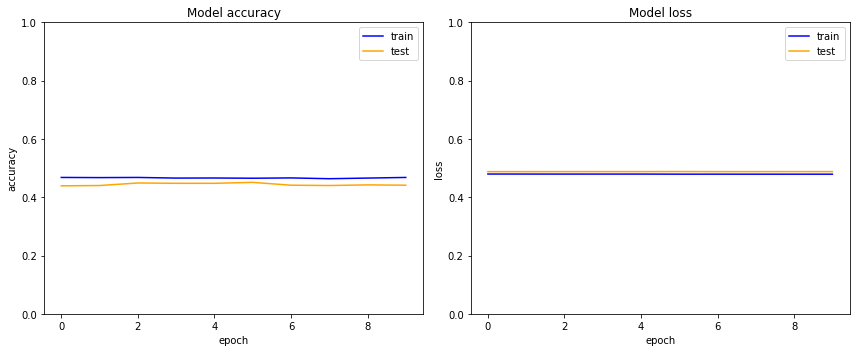

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

results = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10)

fig, axes = plt.subplots(ncols=2, figsize=(12,5))

axes[0].plot(results.history['accuracy'], c='blue', label='train')
axes[0].plot(results.history['val_accuracy'], c='orange', label='test')
axes[0].set_title('Model accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('accuracy')
axes[0].set_ylim(0,1)
axes[0].legend()

axes[1].plot(results.history['loss'], c='blue', label='train')
axes[1].plot(results.history['val_loss'], c='orange', label='test')
axes[1].set_title('Model loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')
axes[1].set_ylim(0,1)
axes[1].legend()

plt.tight_layout()
plt.show()